In [1]:
import pandas as pd
import pymysql
import mysql.connector
import sqlalchemy
from matplotlib import pyplot as plt
import getpass

## Conectando ao DB

In [2]:
password = getpass.getpass()

database = 'notes_app'
user = 'root'
host='localhost'

con = pymysql.connect(host=host, user=user, passwd=password, db=database, charset='utf8mb4')
cur = con.cursor()
cur.execute('SELECT * FROM disciplina')
con.autocommit(True)

## Lendo as tabelas. Nessa análise, usarei apenas a tabela "nota".

In [3]:
disciplina = pd.read_sql("SELECT * FROM disciplina", con)
nota = pd.read_sql("SELECT * FROM nota", con)


In [4]:
nota


,id_nota,titulo,texto,ultima_modificacao,data_criacao,numero_edicoes,disciplina
0,1,Matemática,"A matemática (dos termos gregos μάθημα, transl...",2020-07-24 16:44:49,2021-06-16 08:46:10,13,1
1,2,Equação linear,Diz-se em matemática que uma equação polinomia...,2019-02-05 03:07:41,2020-03-13 08:14:38,10,1
2,3,Equação algébrica,"Em matemática, equações algébricas são equaçõe...",2021-02-05 11:27:51,2021-08-13 04:38:18,6,1
3,4,Equação diferencial,"Em matemática, uma equação diferencial é uma e...",2020-08-24 06:47:59,2021-04-16 20:57:31,21,1
4,5,Vetor (matemática),"Em geometria analítica, um vetor é uma classe ...",2020-12-13 14:35:00,2021-05-01 15:50:43,20,1
...,...,...,...,...,...,...,...
204,205,Roraima,Coordenadas: 2° 03' N 61° 24' O Roraima (pronú...,2020-07-24 00:35:20,2020-07-30 02:56:32,20,7
205,206,Estados Unidos,Estados Unidos da América (EUA; em inglês: Uni...,2019-05-05 14:19:07,2021-01-06 08:32:35,21,7
206,207,Belize,"Coordenadas: 17° 15' N, 88° 45' W Belize (pron...",2021-04-16 16:38:18,2021-11-04 06:06:13,13,7
207,208,Gibraltar,Coordenadas: 36° 7' N 5° 21' O Gibraltar (pron...,2020-02-27 11:03:51,2021-02-09 20:32:08,17,7


## Em relação ao número de edições, as quantidades em cada matéria tendem a ter valores com tendência parecida ou diferente?
### Essa questão pode ser útil principalmente para termos ideia de dados estatísticos das edições dos alunos. Podemos saber se as edições têm uma tendência a ter números semelhantes ou é algo que tende a não seguir um padrão. Para isso, é necessário encontrar o desvio padrão, além de olharmos outros dados para o caso de existir um outlier que possa comprometer a análise.


In [5]:
mean = nota['numero_edicoes'].mean()
std = nota['numero_edicoes'].std()
min = nota['numero_edicoes'].min()
max = nota['numero_edicoes'].max()
print('A média de edições de todas as anotações foi',mean)
print('O desvio padrão tem o valor de',std)
print('O menor número de edições entre todos os documentos foi', min)
print('E o maior número de edições foi',max)

A média de edições de todas as anotações foi 14.15311004784689
O desvio padrão tem o valor de 5.017805066455521
O menor número de edições entre todos os documentos foi 5
E o maior número de edições foi 22


<AxesSubplot:>

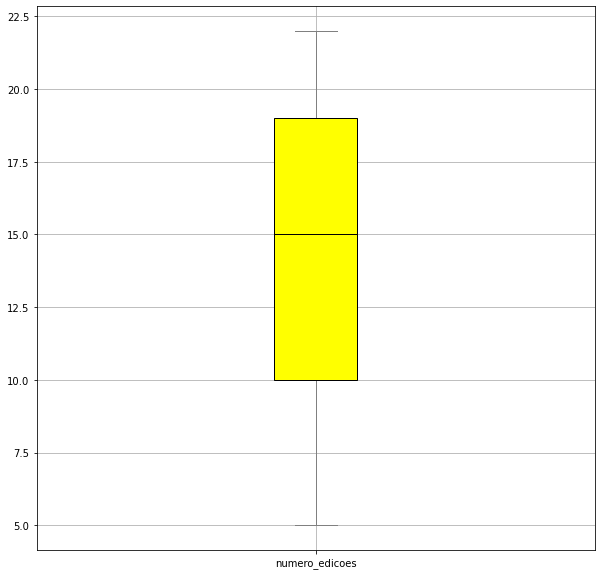

In [6]:
plt.rcParams['figure.figsize'] = (10,10)

nota.boxplot(column=['numero_edicoes'], patch_artist=True,
                   boxprops=dict(facecolor='yellow', color='black'),
                   capprops=dict(color='gray'),
                   whiskerprops=dict(color='gray'),
                   flierprops=dict(color='gray', markeredgecolor='gray'),
                   medianprops=dict(color='black'))

### Também coloquei um boxplot para retratar os dados informados como imagem. Podemos conferir que não houve nenhum outlier e o desvio padrão foi baixo, identificando que, nessa situação, a quantidade de atualização de notas dos usuários tendem a permanecer em uma faixa concentrada de números.